In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [3]:
import glob
weekly_dump_directory = '../data/gabbar-0.4/weekly-dump/*.csv'
dump_files = glob.glob(weekly_dump_directory)

In [4]:
changesets = pd.read_csv('../data/exploratory-data-analysis/changesets.csv')
print(changesets.shape)
changesets.sample(3)

(39009, 19)


,ID,user,editor,Powerfull Editor,comment,source,imagery used,date,reasons,reasons__name,create,modify,delete,bbox,is suspect,harmful,checked,check user,check date
17362,43789617,darren chan,MAPS.ME ios 6.4.4,False,Not reported,Not reported,Not reported,2016-11-19T04:57:02+00:00,NaN,NaN,1.0,1.0,0.0,"SRID=4326;POLYGON ((121.5177563 25.0610875, 12...",False,False,True,22,2016-11-21T05:22:16.394872+00:00
1226,45873616,Steven Saltos,MAPS.ME android 7.1.3-Google,False,Created a cafe,Not reported,Not reported,2017-02-07T04:06:23+00:00,NaN,NaN,1.0,0.0,0.0,"SRID=4326;POLYGON ((-79.460292 -0.2780972, -79...",False,False,True,11,2017-02-07T06:51:39.867693+00:00
25265,40710580,Kestas112,JOSM/1.5 (9060 ru),True,Not reported,Not reported,Not reported,2016-07-13T12:18:28+00:00,2.0,possible import,22915.0,0.0,0.0,"SRID=4326;POLYGON ((22.4552026 55.6196097, 23....",True,True,True,18,2016-07-25T19:11:00.919707+00:00


In [5]:
features = pd.read_csv('../data/exploratory-data-analysis/features.csv')
print(features.shape)
features.sample(3)

(39009, 9)


,ID,user,harmful,create,modify,delete,bbox_area,user_changesets,user_features
29275,39280626,Russell720,False,235.0,105.0,143.0,296.3840,4650.0,420328.0
19880,43357277,Supaplex,False,2.0,4.0,0.0,9.1224,11266.0,1198127.0
20377,43210946,Petr1868,False,11500.0,9761.0,5471.0,179.3791,14200.0,27769569.0


In [6]:
features['user'].value_counts()[:3]

chinakz                     2912
pnorman redaction revert     687
woodpeck_repair              342
Name: user, dtype: int64

In [7]:
# Filtering out changesets from user "chinakz"
features = features[features['user'] != 'chinakz']
features.shape

(36097, 9)

In [8]:
columns = ['create', 'modify', 'delete', 'bbox_area', 'user_changesets', 'user_features', 'harmful']
numerical_features = features[columns].dropna()
numerical_features.shape

(35347, 7)

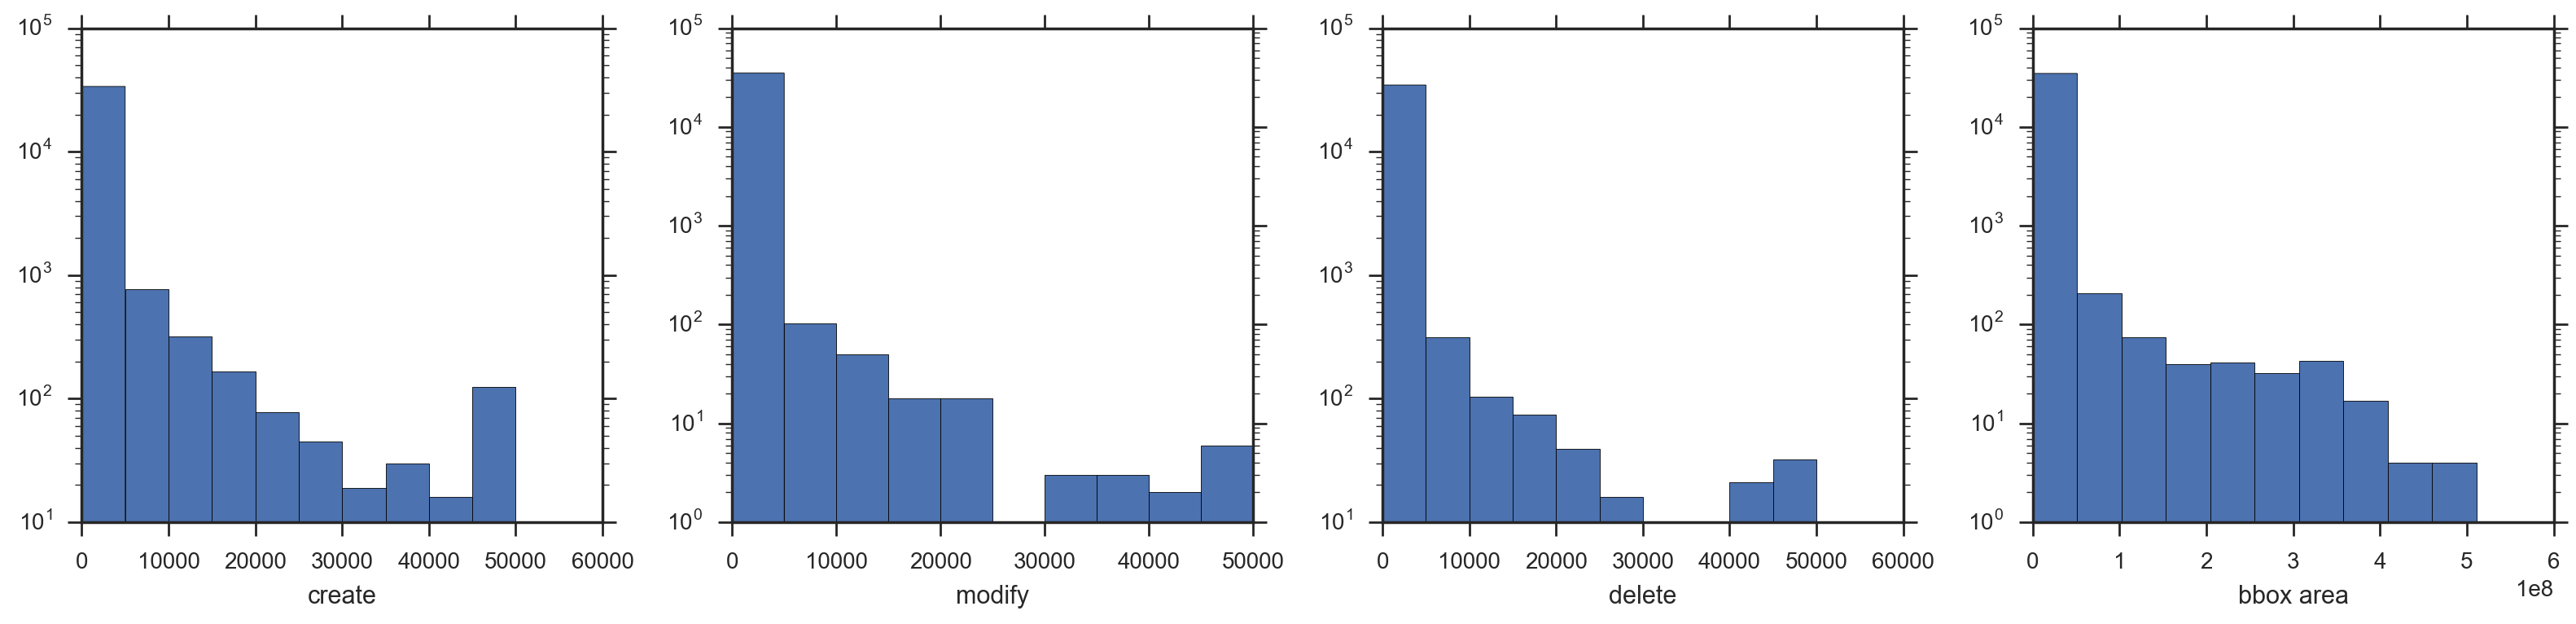

In [9]:
(fig, ax) = plt.subplots(1, 4, figsize=(16, 4))

ax[0].hist(numerical_features['create'])
ax[0].set_yscale('log')
ax[0].set_xlabel('create')

ax[1].hist(numerical_features['modify'])
ax[1].set_yscale('log')
ax[1].set_xlabel('modify')

ax[2].hist(numerical_features['delete'])
ax[2].set_yscale('log')
ax[2].set_xlabel('delete')

ax[3].hist(numerical_features['bbox_area'])
ax[3].set_yscale('log')
ax[3].set_xlabel('bbox area')

plt.tight_layout()

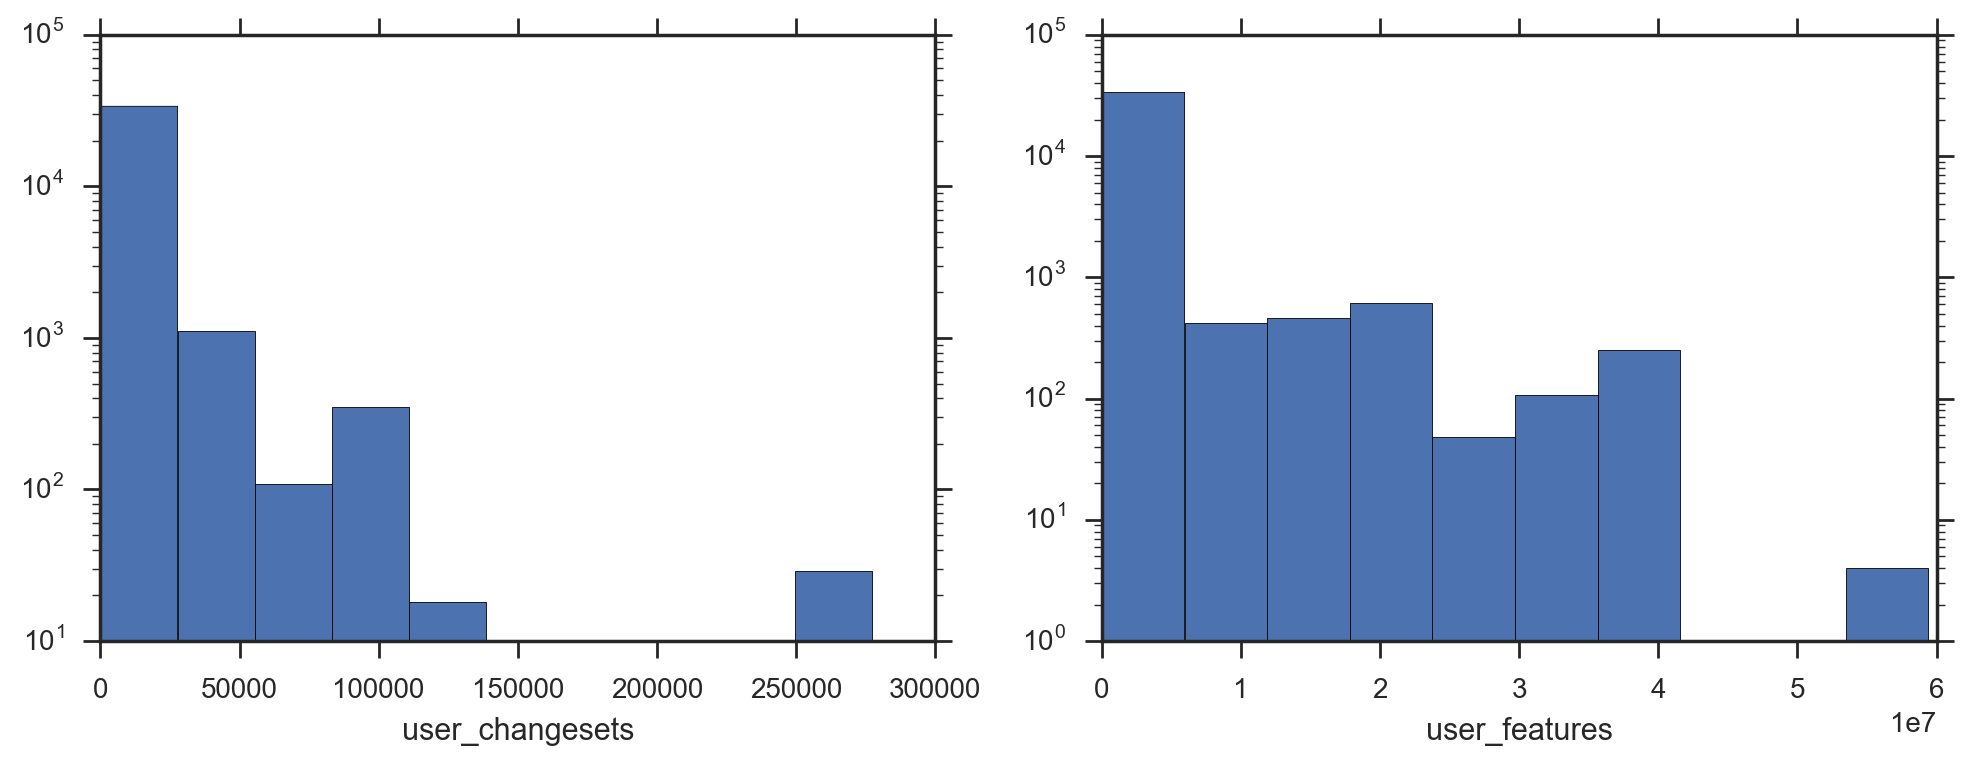

In [10]:
(fig, ax) = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(numerical_features['user_changesets'])
ax[0].set_yscale('log')
ax[0].set_xlabel('user_changesets')

ax[1].hist(numerical_features['user_features'])
ax[1].set_yscale('log')
ax[1].set_xlabel('user_features')

plt.tight_layout()

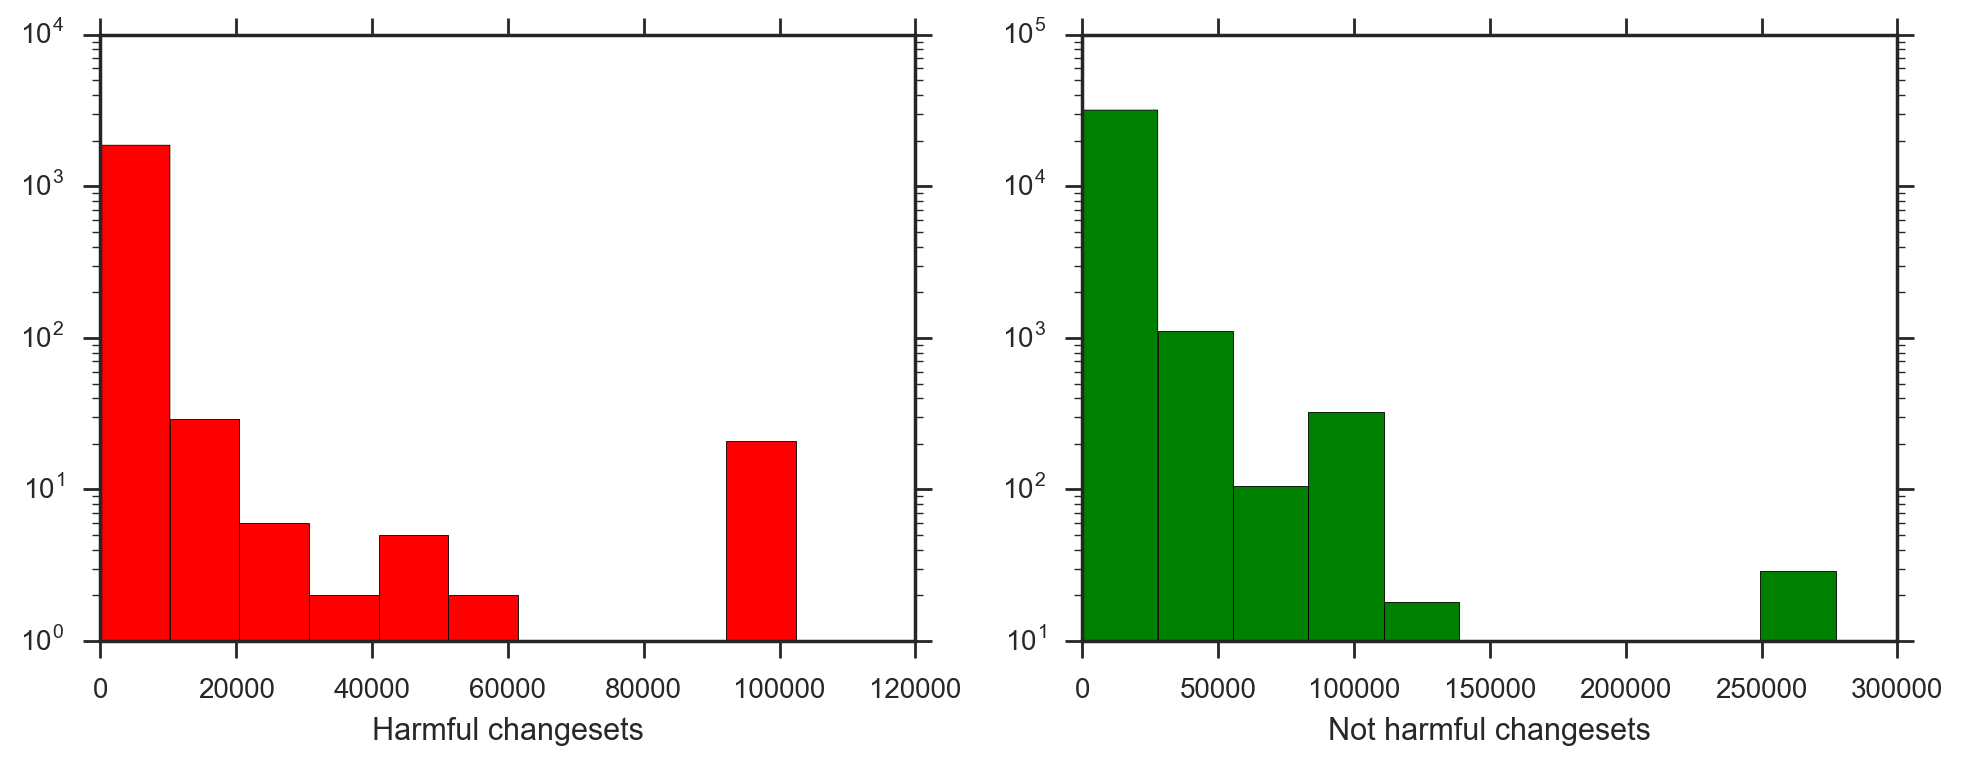

In [11]:
(fig, ax) = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(numerical_features[numerical_features['harmful'] == True]['user_changesets'], color='r')
ax[0].set_yscale('log')
ax[0].set_xlabel('Harmful changesets')

ax[1].hist(numerical_features[numerical_features['harmful'] == False]['user_changesets'], color='g')
ax[1].set_yscale('log')
ax[1].set_xlabel('Not harmful changesets')

plt.tight_layout()

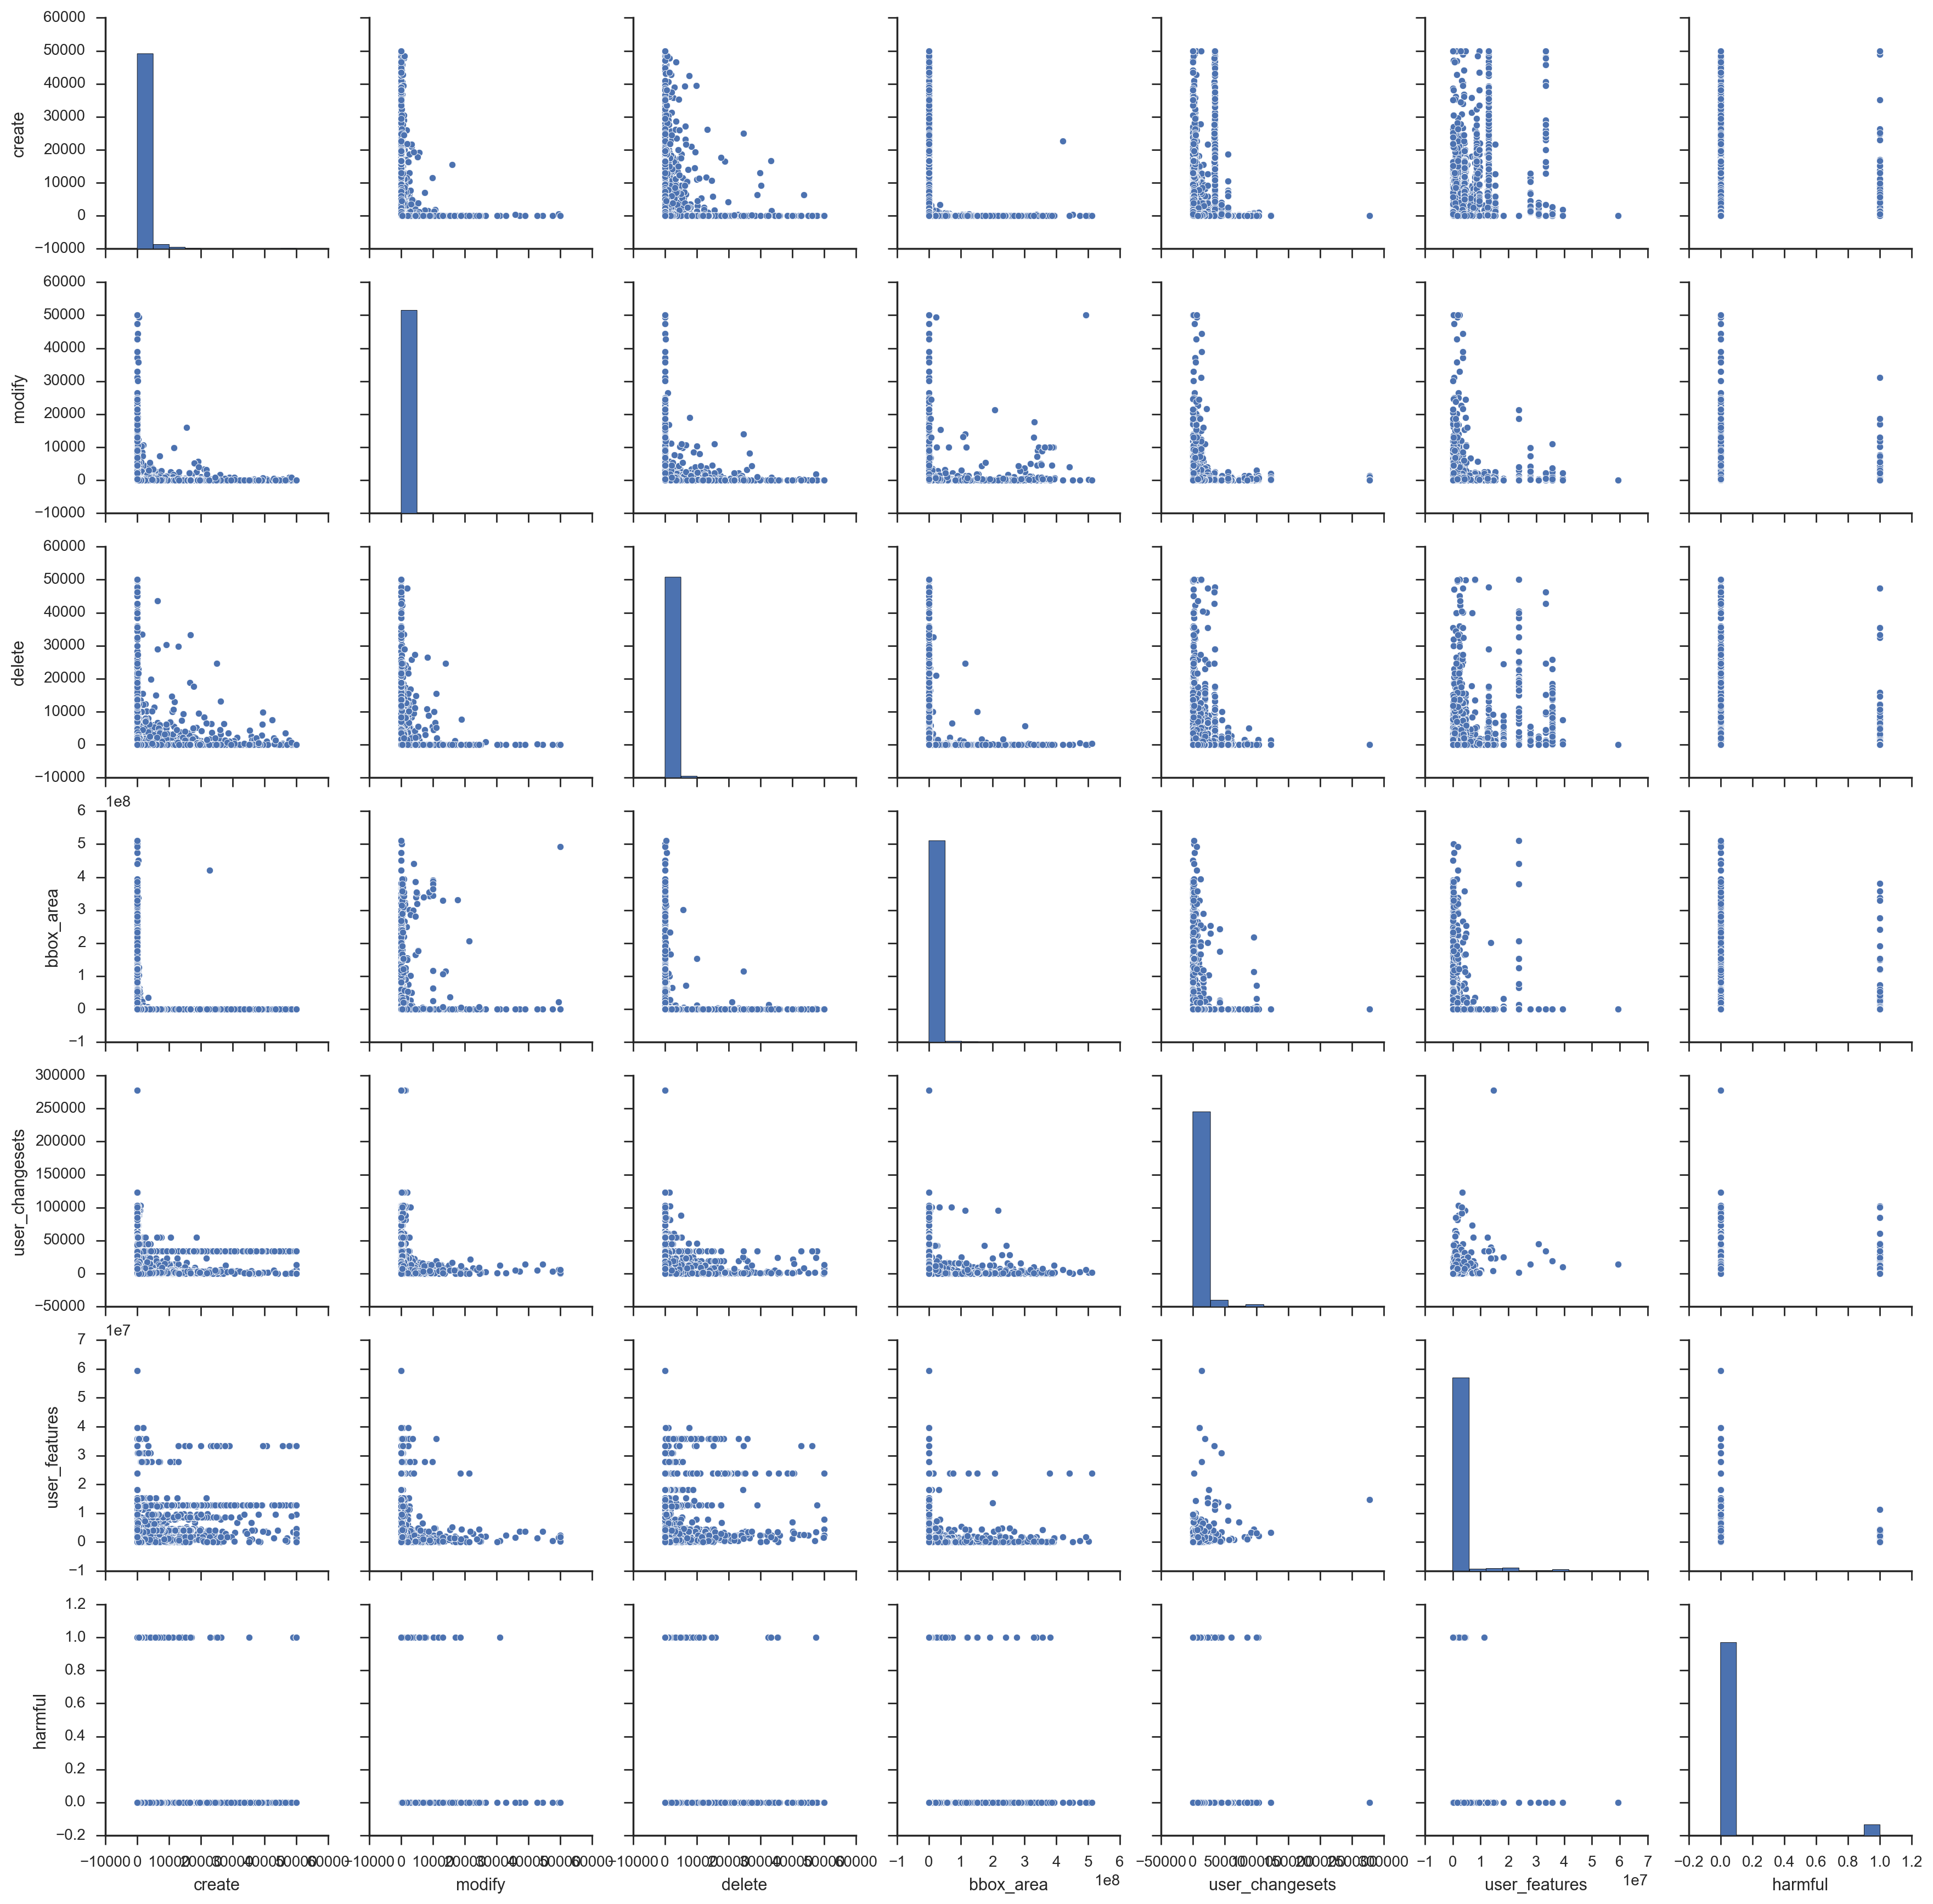

In [12]:
sns.pairplot(numerical_features)

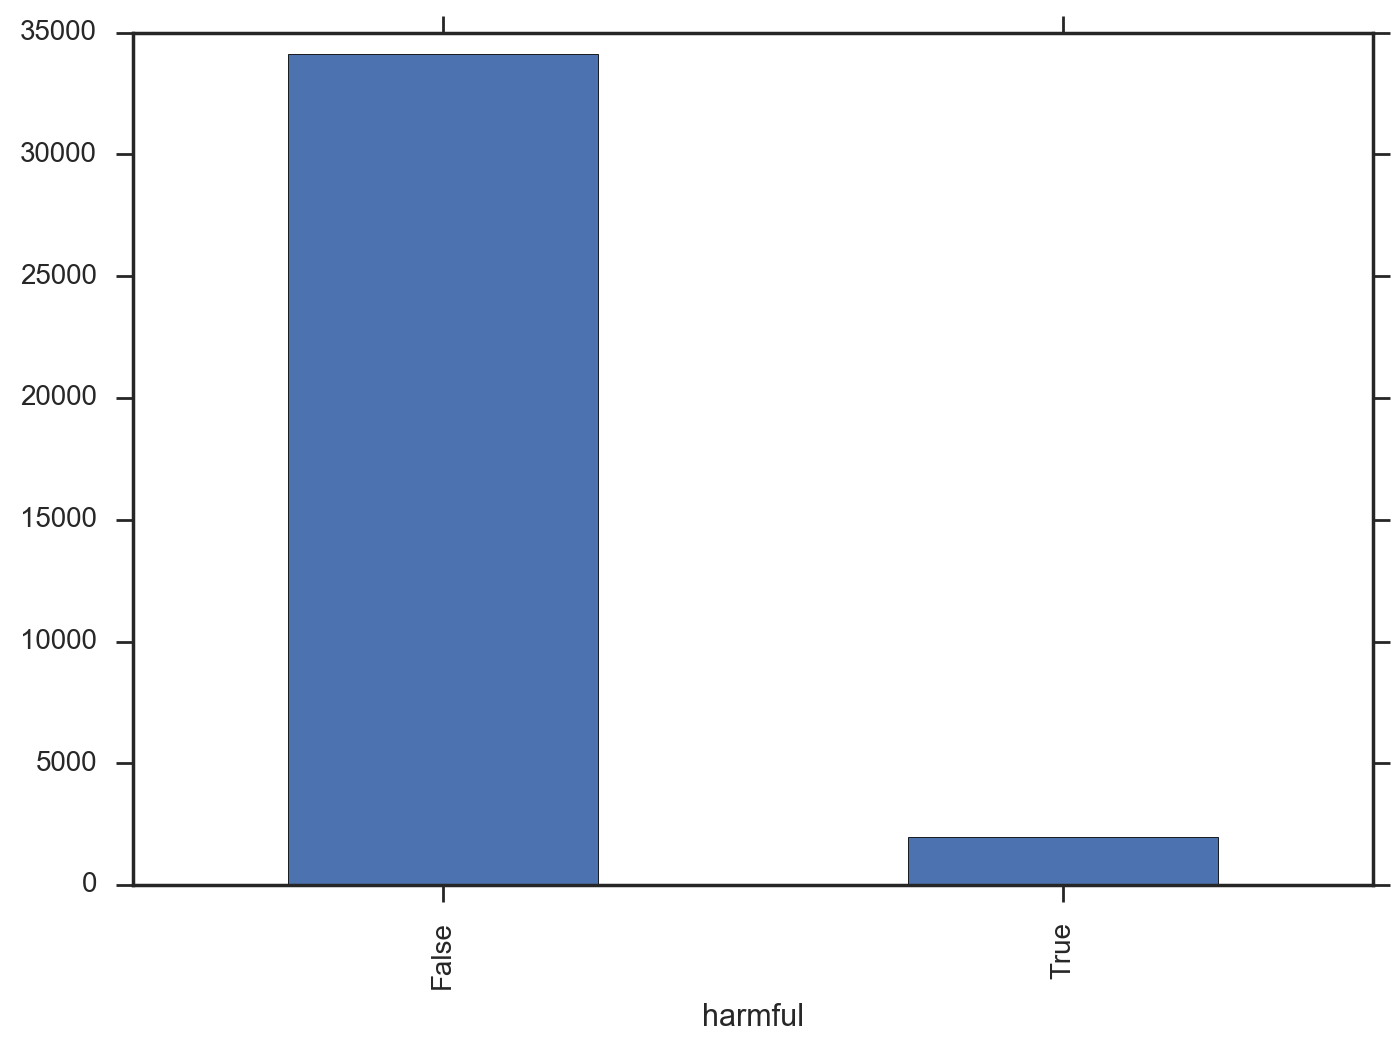

In [13]:
features.groupby('harmful')['ID'].count().plot.bar()

In [14]:
numerical_features.describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,35347.000000,35347.000000,35347.000000,3.534700e+04,35347.000000,3.534700e+04
mean,893.130987,167.810479,406.342971,2.388298e+06,5865.765666,1.662490e+06
std,4096.758967,1268.094232,2547.154009,2.211351e+07,15081.393239,4.847374e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,5.075000e-02,94.000000,4.873000e+03
50%,4.000000,1.000000,0.000000,1.174900e+00,1272.000000,1.753780e+05
75%,210.000000,19.000000,26.000000,5.106520e+01,5049.000000,1.082325e+06
max,50001.000000,50000.000000,50001.000000,5.112079e+08,277340.000000,5.940455e+07


In [15]:
numerical_features[numerical_features['harmful'] == False].describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,33414.000000,33414.000000,33414.000000,3.341400e+04,33414.000000,3.341400e+04
mean,897.188185,170.000958,411.420363,2.410824e+06,6069.780391,1.744047e+06
std,4017.039436,1274.574333,2565.530517,2.215394e+07,15250.150445,4.970231e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,5.152500e-02,112.000000,6.631000e+03
50%,4.000000,1.000000,0.000000,1.187650e+00,1385.000000,2.007780e+05
75%,218.000000,20.000000,27.000000,5.234010e+01,5350.000000,1.146658e+06
max,50001.000000,50000.000000,50001.000000,5.112079e+08,277340.000000,5.940455e+07


In [16]:
numerical_features[numerical_features['harmful'] == True].describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1.933000e+03
mean,822.997931,129.945680,318.574754,1.998918e+06,2339.150026,2.527040e+05
std,5288.997482,1149.965431,2204.160201,2.140451e+07,11219.536181,7.387584e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,3.880000e-02,19.000000,3.670000e+02
50%,5.000000,1.000000,0.000000,1.027200e+00,94.000000,4.628000e+03
75%,61.000000,9.000000,20.000000,3.217940e+01,780.000000,8.168200e+04
max,50001.000000,31061.000000,47417.000000,3.805021e+08,102423.000000,1.136299e+07


In [17]:
features[features['user_changesets'] > 100000]['user'].value_counts()

samely       74
dannykath    63
andrewpmk    29
calfarome    21
RichRico     18
Name: user, dtype: int64

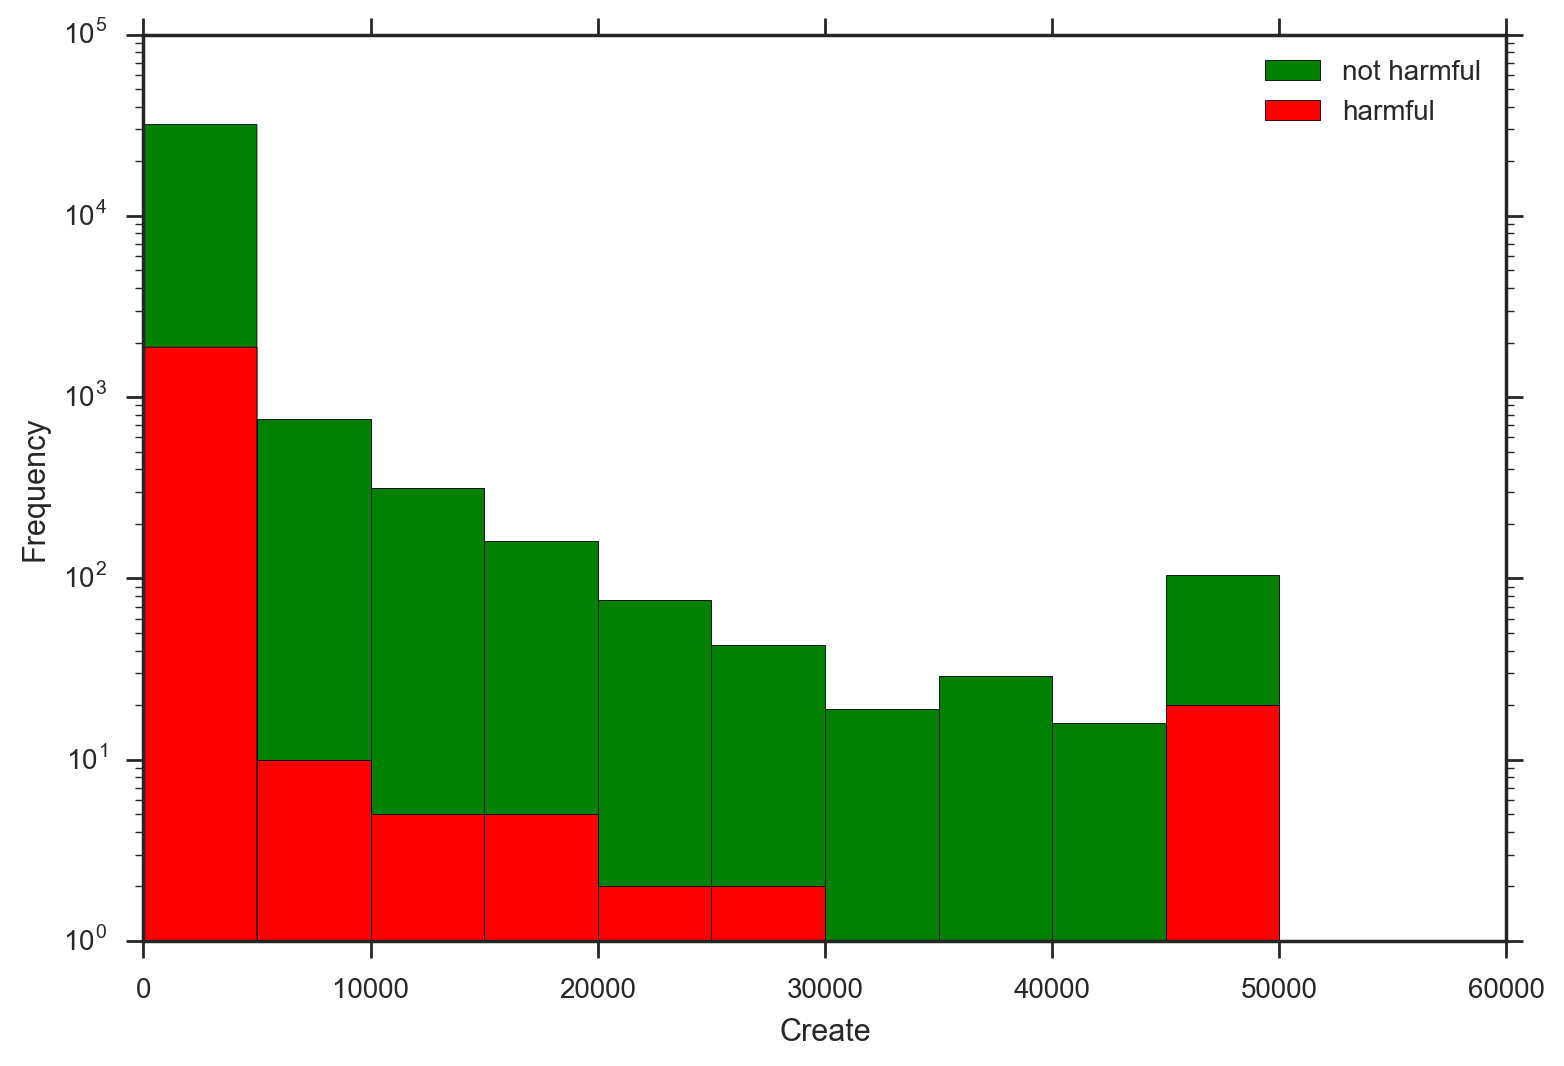

In [87]:
ax = numerical_features[numerical_features['harmful'] == False]['create'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['create'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Create')
plt.tight_layout()

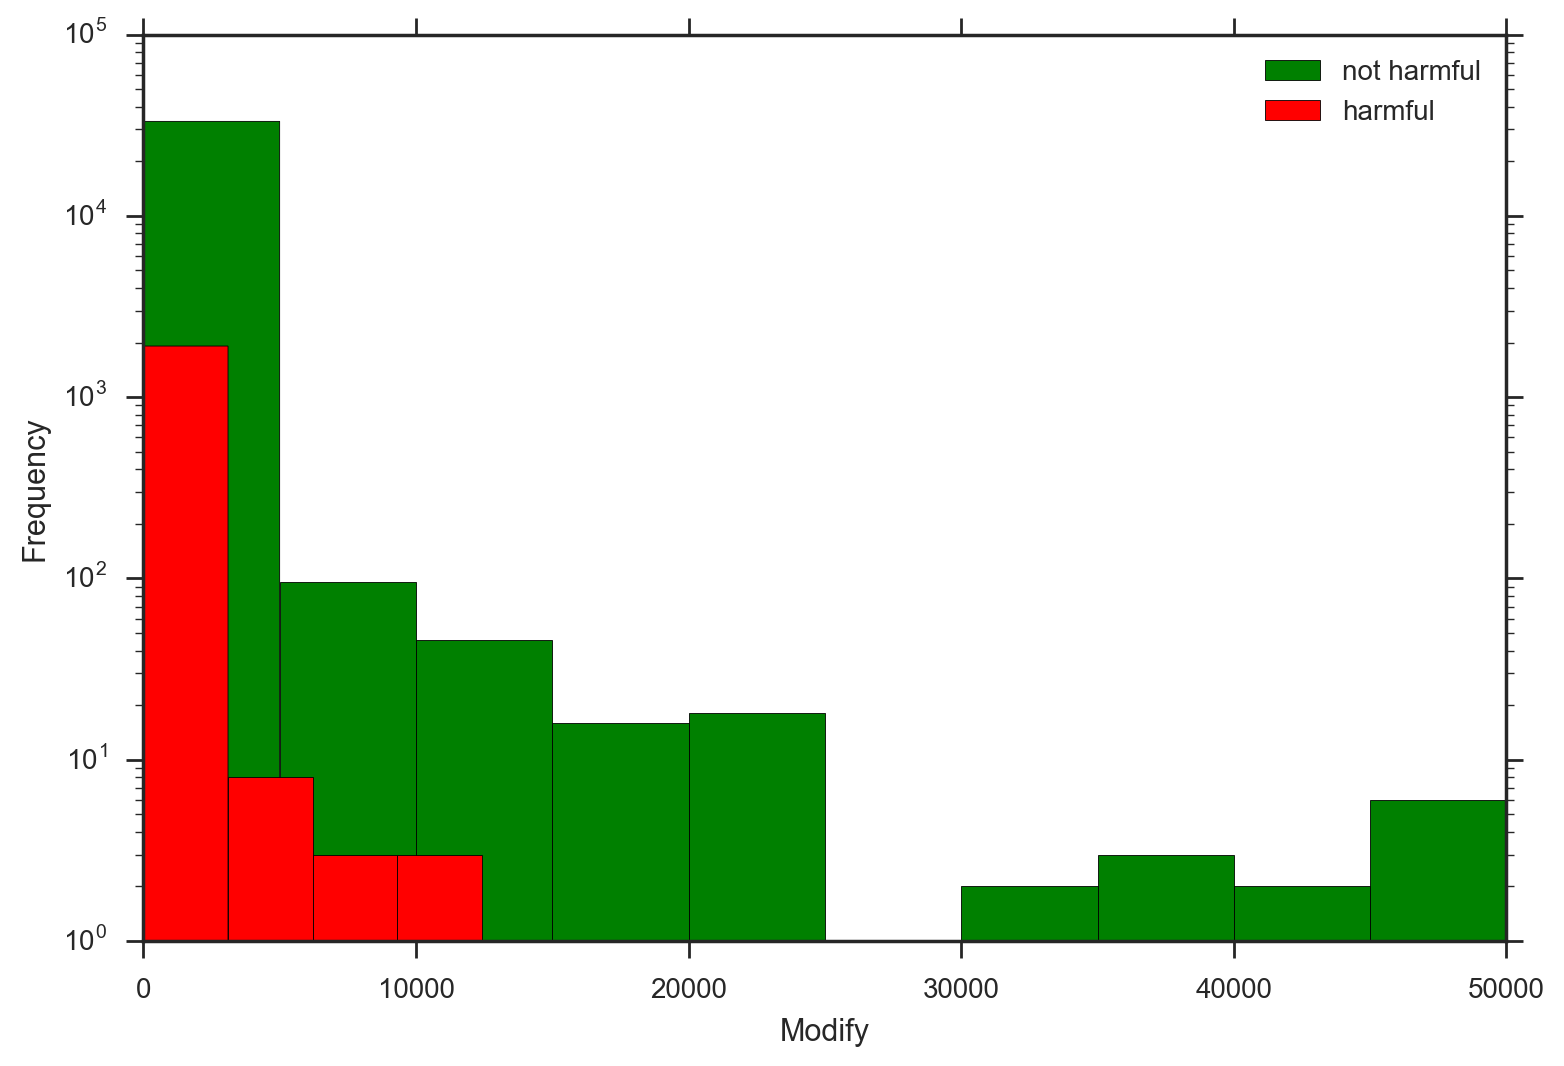

In [86]:
ax = numerical_features[numerical_features['harmful'] == False]['modify'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['modify'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Modify')
plt.tight_layout()

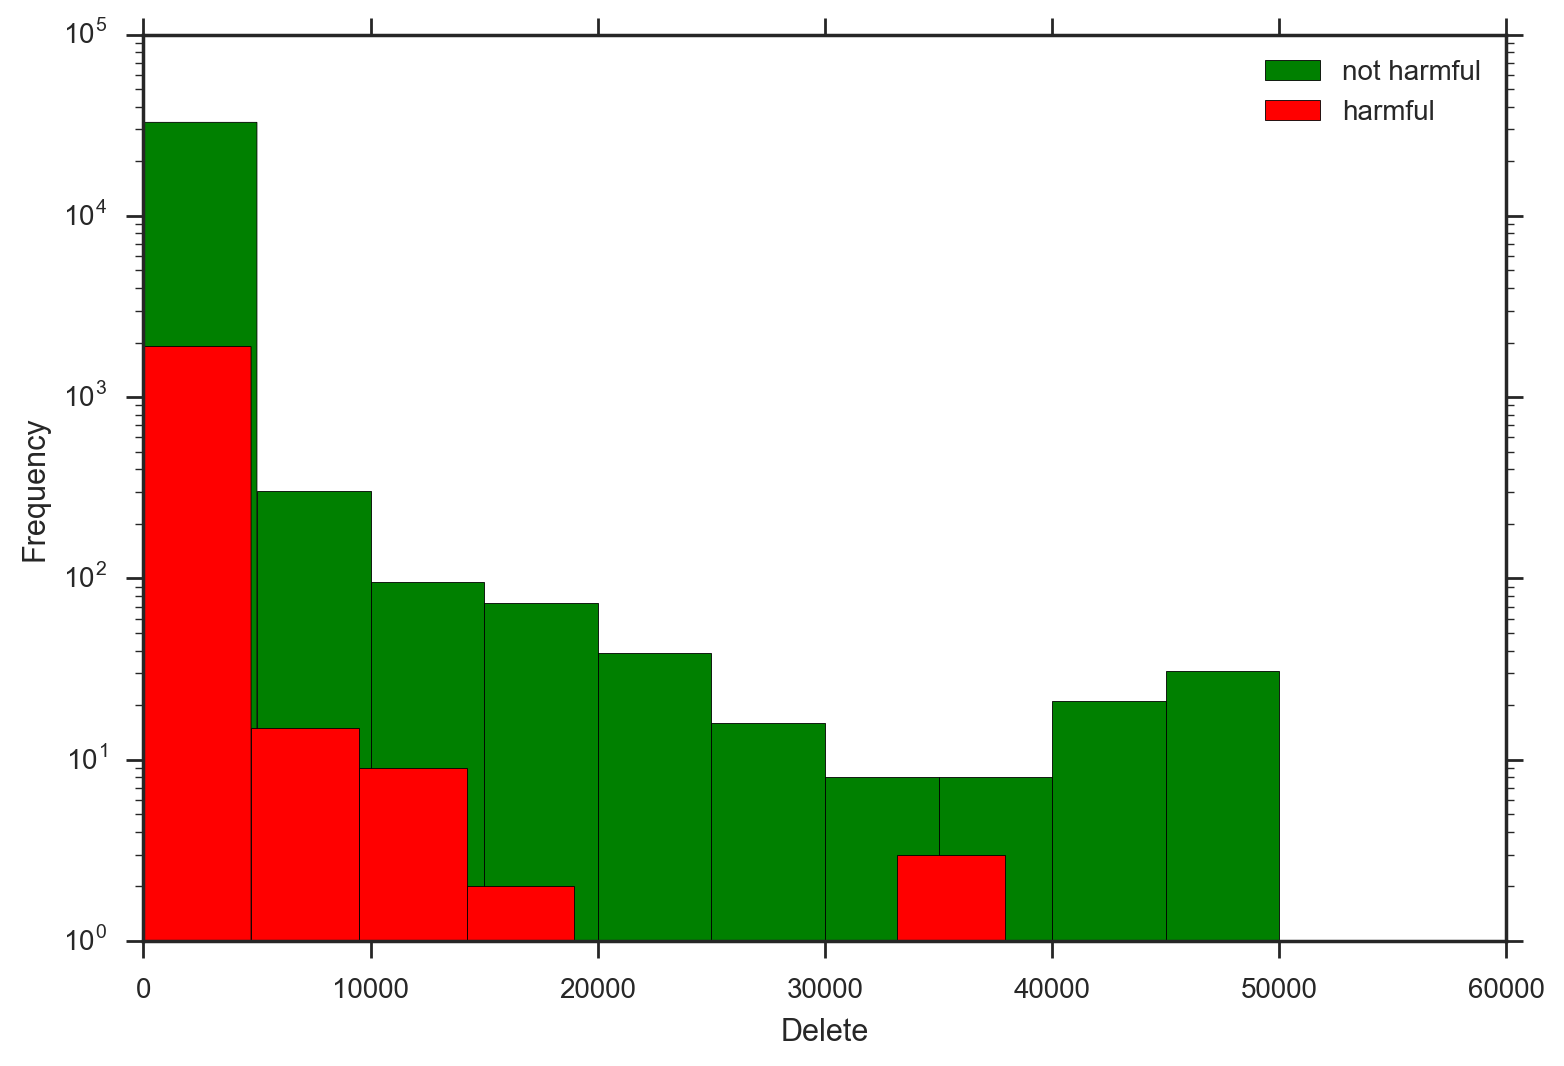

In [85]:
ax = numerical_features[numerical_features['harmful'] == False]['delete'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['delete'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Delete')
plt.tight_layout()

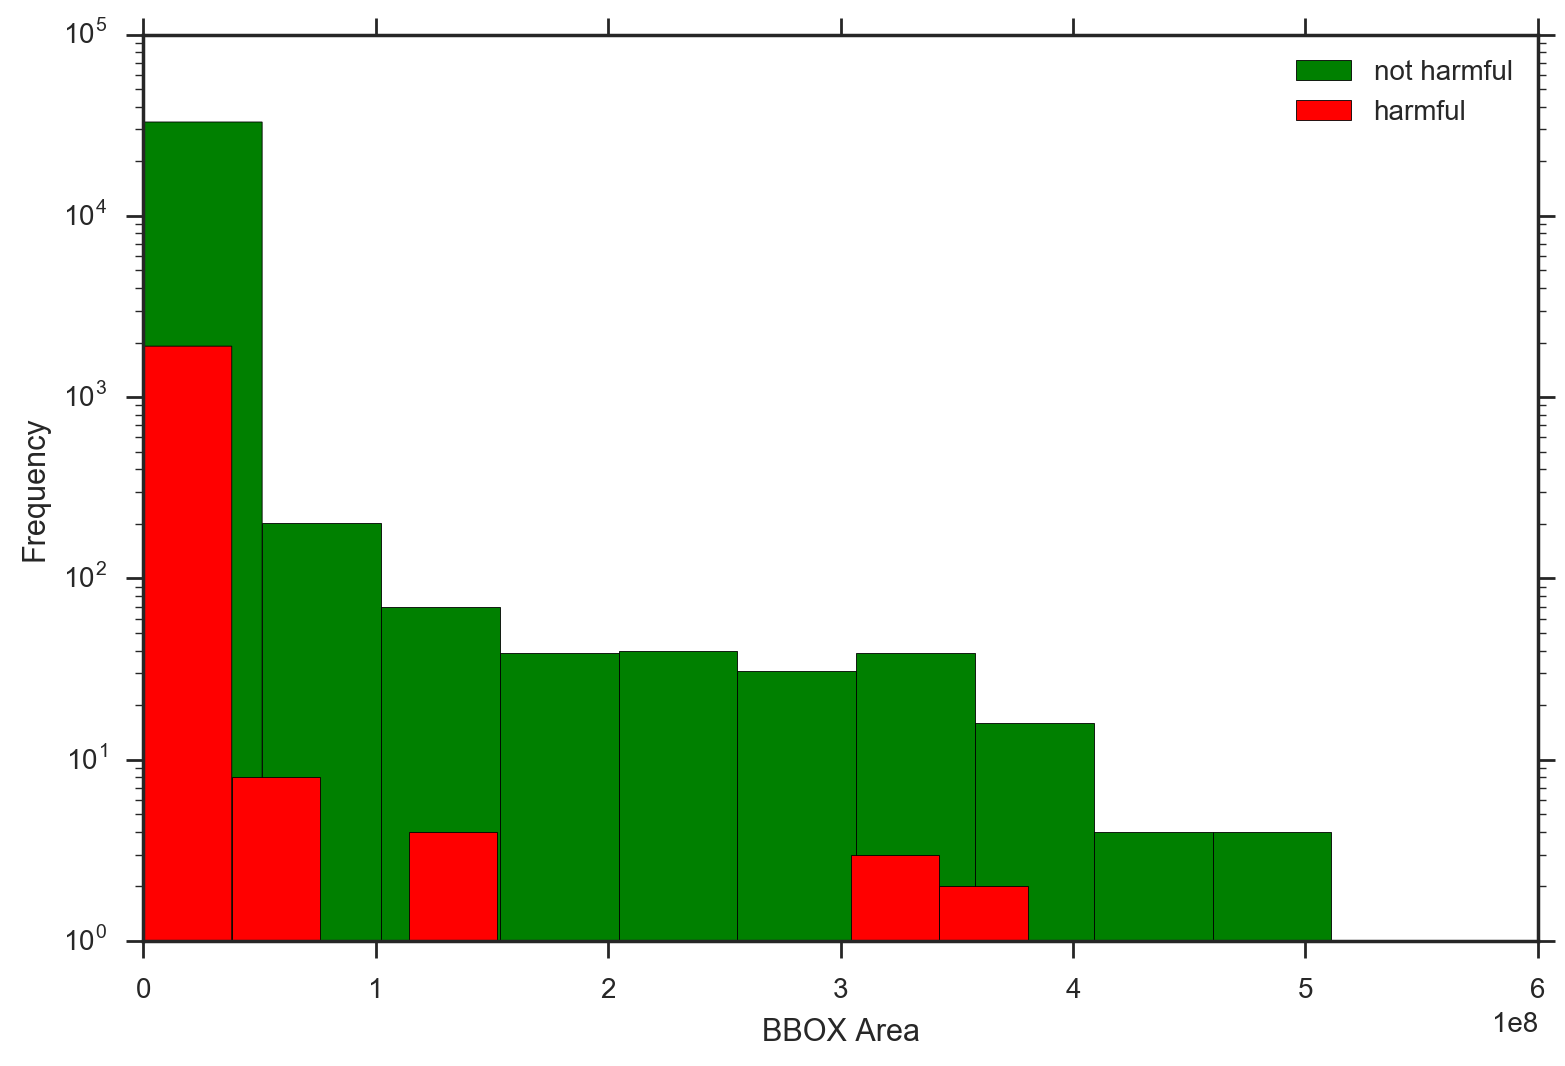

In [84]:
ax = numerical_features[numerical_features['harmful'] == False]['bbox_area'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['bbox_area'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('BBOX Area')
plt.tight_layout()

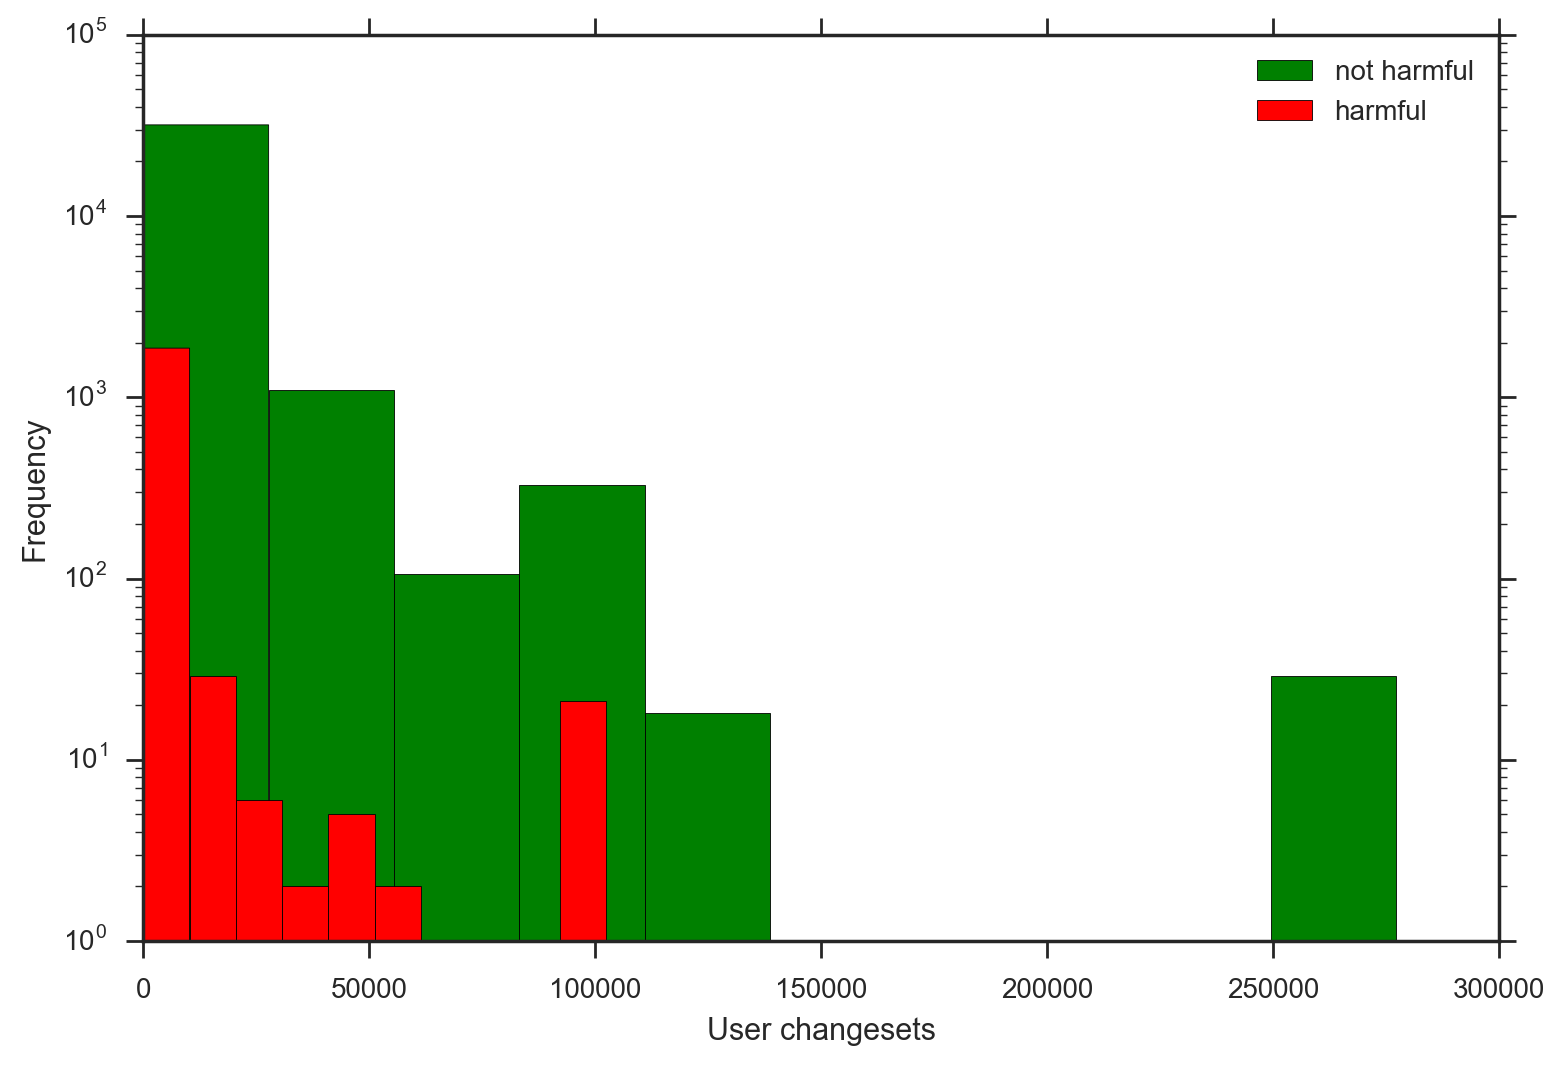

In [82]:
ax = numerical_features[numerical_features['harmful'] == False]['user_changesets'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['user_changesets'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User changesets')
plt.tight_layout()

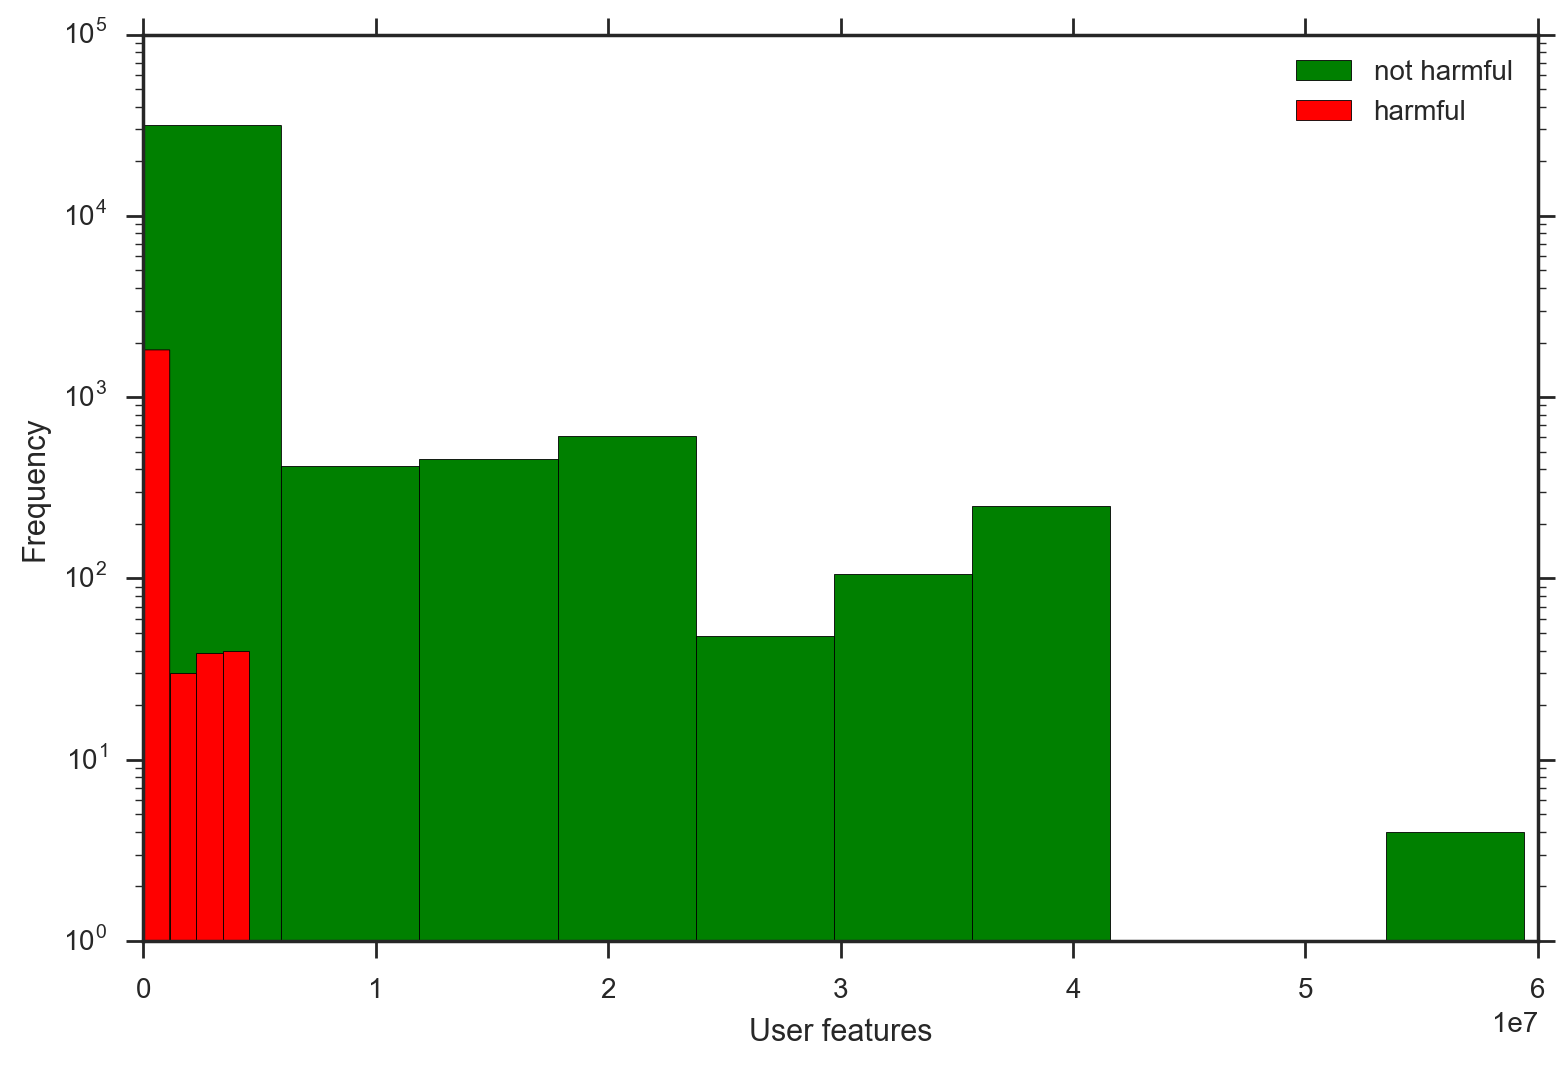

In [83]:
ax = numerical_features[numerical_features['harmful'] == False]['user_features'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['user_features'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User features')
plt.tight_layout()